# 🤖 AI, MACHINE LEARNING & PYTHON 🤖

## Why does it all matter? 

AI is everywhere, particularly in healthcare.


![image](.//headline_1.png)

![image](.//headline_2.png)

AI is going to become more and more prominent within the NHS.

![image](.//headline_3.png)

Also, AI is just really interesting! (And sometimes a bit scary!) It's here to stay, so understanding it is going to be an incredibly useful skill.
Here are a final selection of headlines to show just how **versatile**, **interesting**, and **important** AI is becoming.

![image](.//headline_4.png)

![image](.//headline_5.png)

## What is todays plan? 

##### **Can we create a model that can predict if an individual has breast cancer?**

![image](.//headline_6.png)

### Before we get into coding - let us quickly give some definitions. 

#### AI vs Machine Learning

- AI is a general term used to describe computers completing task that we would consider clever or intelligent. 

- Machine Learning is a particular application of AI, it is the idea that with data, computers can learn for themselves and make predictions. 



## Python Recap

We are going to give a quick recap of python functions to help with our understanding later. 

In [34]:
# This is a very simple function that works out percentages.
# You pass it in two numbers, called parameters.
# These represent the numerator and denominator of a fraction.
# Some simple maths is done, and the fraction is returned.  

def calculate_percentage(numerator, denominator):
    fraction = numerator / denominator
    return fraction * 100

# When you run this code snippet nothing will happen,
# you need to call the function for it to return you something.

In [35]:
# Call the function here:

# calculate_percentage( """your_values_here""" )

## Machine Learning time!

To create our machine learning model, a lot of the code we are about to use uses functions. We get these functions from libraries which we can import.

In [36]:
# This first function is used to load a pre-existing breast cancer dataset
from sklearn.datasets import load_breast_cancer

# Pandas is a library containing lots of functions used to modify and navigate dataframes.
import pandas as pd

# Plotly is a library which helps us generate plots.
import plotly.express as px

In [37]:
# We are about to use the load_breast_cancer function from sklearn 
# This line calls the function to return:

#breast_cancer_inputs  
# - This is the raw data containing information about different breast cancer screenings

#breast_cancer_outputs 
# - This contains the classification of whether each screening is identified as being breast cancer

breast_cancer_inputs, breast_cancer_outputs = load_breast_cancer(return_X_y=True, as_frame=True) 

In [38]:
# What does the data look like?
display(breast_cancer_inputs)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Let's be honest, this data is really confusing and we cannot really tell anything from it!

We can create a plotting function to help us spot some trends. 

In [39]:
def produce_scatter_plot(input_dataframe: pd.DataFrame,
                         output_series: pd.Series,
                         columns:list):
    """Produces a 2D or 3D scatter plot based on columns from dataframe.

    Args:
        input_dataframe (pd.DataFrame): The dataframe containing breast cancer information
        output_series (pd.Series): The dataframe containing diagnosis information
        columns (list): The columns to plot.
    """
    
    # Generate a series of strings to use as a colour key
    colours = pd.Series("True" if  value else False for value in output_series)
    
    #Check the length of the columns.
    # If length is 3, make a 3D plot.
    # If length is 2, make a 2D plot.
    if len(columns) == 3:
        fig = px.scatter_3d(input_dataframe, x=columns[0], y=columns[1], z=columns[2], color=colours, symbol =colours, labels={"color": "Diagnosis", "Symbol": "Diagnosis"})
    elif len(columns) == 2:
        fig = px.scatter(input_dataframe, x=columns[0], y=columns[1], color=colours, symbol =colours, labels={"color": "Diagnosis", "Symbol": "Diagnosis"})
    elif len(columns) != (2 or 3):
        print("Please only use 2 or 3 columns")
        return None

    # Update the graphics
    fig.update_traces(marker=dict(size = 4 if len(columns) == 3 else 10,
                              line=dict(width=2, color='DarkSlateGrey')),
                              selector=dict(mode='markers'))
    
    fig.show()
    return None

![image](.//task.png)

This plotting function can be called by passing into it breast_cancer_inputs, breast_cancer_outputs, and an array of column names.

Try using the column names to generate some 2D and 3D plots, see if you see any trends. 

In [40]:
# Remind ourselves of the column names
print(breast_cancer_inputs.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [41]:
produce_scatter_plot(breast_cancer_inputs,
                     breast_cancer_outputs,
                     [])

Please only use 2 or 3 columns


In [42]:
produce_scatter_plot(breast_cancer_inputs,
                     breast_cancer_outputs,
                     [])

Please only use 2 or 3 columns


There are 30 different columns within this dataset, meaning there are 439 different pairs you could plot in a 2D graph. Spotting patterns, or more importantly the most important patterns, is an incredibly complex task. 

Further to this, imagine having a 30 dimensional scatter plot to try and spot patterns. For us, it is impossible! But for a machine, this is something it can do easily. 

#### Can we use this data in a machine learning model? Yes!

In [43]:
from sklearn.model_selection import train_test_split

# When creating a machine learning model, it is important to have some training data and some testing data.

# Training data - this is data that is used to train the model.
# Testing data - this is data used to test the model.

# The following function splits our data randomly to test and training data.
breast_cancer_inputs_training, breast_cancer_inputs_testing, breast_cancer_outputs_training, breast_cancer_outputs_testing = train_test_split(breast_cancer_inputs, breast_cancer_outputs, train_size=0.8)

# train_size represents the proportion of data that should be used for training
# - we have gone for 80%

#### There are multiple types of machine learning algorithms: 

**Classification algorithms** are machine learning techniques used to predict categorical labels or classes based on input data.

**Regression algorithms** are machine learning techniques used to predict continuous numerical values based on input data.

**Clustering algorithms** are machine learning techniques used to group similar data points together based on their inherent similarities, without any predefined labels.

#### Can you tell which type of algorithm we want to use?

In [44]:
from sklearn.ensemble import RandomForestClassifier

# This is one example of a classification model, called a random forest classifier.
# Others are available, which you can look up if you would like to. 

classification_model = RandomForestClassifier()

Once we have a model, our next step is to train it.

sklearn has an incredibly useful function - `fit` 

The fit method trains the algorithm on the data.

How it does this depends on the model. If you would like to know more about the random forest algorithm you can read about it here: https://www.turing.com/kb/random-forest-algorithm. But, a lot of this specific knowledge you wont need to know today. What is important is that we are using a model that can be trained -  it can use data we feed it to create a predictive algorithm.




In [45]:
classification_model.fit(breast_cancer_inputs_training,breast_cancer_outputs_training)

RandomForestClassifier()

Next, we can use `predict`. This uses the model we have just trained to predict the results of our test set. It really is that simple!

In [46]:
predictions = classification_model.predict(breast_cancer_inputs_testing)

What do the predictions actually look like? 

In [47]:
print(predictions)

[0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1
 1 1 0]


Let's do some analysis to see how good our predictions are! 

In [48]:
# matplotlib is another plotting library similar to plotly.

import matplotlib.pyplot as plt

def plot_predictions(predictions, actual):
    """Creates a pie chart

    Args:
        predictions (Series): Predicted values by the model
        actual (Series): Actual values
    """

    correct_predictions = 0
    incorrect_predictions = 0

    for prediction, value in zip(predictions, actual):
        if prediction == value:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

    total_predictions = len(predictions)

    # Remember our function we made earlier!
    correct_percentage = round( calculate_percentage(correct_predictions,total_predictions) ,1)
    incorrect_percentage = round( calculate_percentage(incorrect_predictions,total_predictions), 1)

    # Plot the chart
    plt.pie([correct_predictions,incorrect_predictions],
            labels=[f"Correct Predictions\n{correct_percentage}",f"Incorrect Predictions\n{incorrect_percentage}%"])
             
    # Add a title
    plt.title("Percentage of Correct and Incorrect Predictions")
    
    return None
    

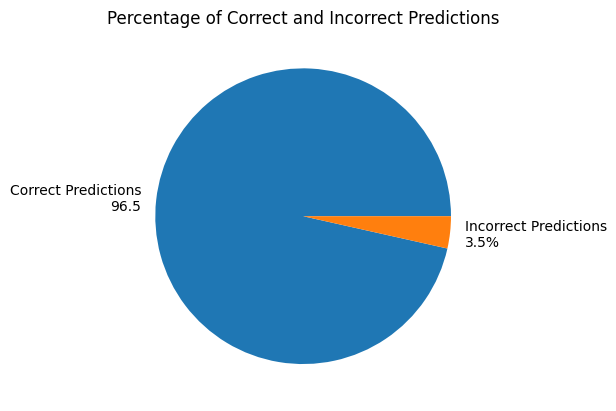

In [49]:
plot_predictions(predictions, breast_cancer_outputs_testing)

There are other ways to analyse our results. For example using a confusion matrix. 

In [50]:
from sklearn import metrics

def generate_confusion_matrix(predicted, actual):
    """Creates a confusion matrix chart

    Args:
        predictions (Series): Predicted values by the model
        actual (Series): Actual values
    """
    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()

    plt.title("Confusion Matrix")

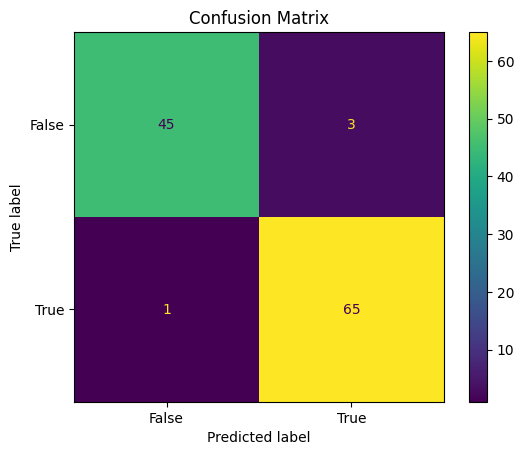

In [51]:
generate_confusion_matrix(predictions, breast_cancer_outputs_testing)

### What does this actually show? 

The matrix has four squares, each representing a different combination of actual and predicted classifications. The squares are:

- True Positive (TP): The model correctly predicted the positive diagnosis.
- False Positive (FP): The model incorrectly predicted the positive diagnosis.
- True Negative (TN): The model correctly predicted the negative diagnosis.
- False Negative (FN): The model incorrectly predicted the negative diagnosis.

Can you tell which square is which in the above matrix?

Another method of analysis is an **F1 Score**

This is given as:

**F1 = 2 * (precision * recall) / (precision + recall)**

Where:
- Precision is a measure of how many predicted positive diagnosis' are actually positive. This is found by taking the number of true positives and dividing by the number of true and false positives.
- Recall is the percentage of positive cases that are correctly predicted by the model.

A perfect prediction would give an F1 score of 1, with the worst possible score being 0. 


In [52]:
f1_score = metrics.f1_score(breast_cancer_outputs_testing, predictions)

print(f1_score)

0.9701492537313432


![image](.//task.png)

So you have made predictions using the random forest algorithm, but could you use something else instead?

Head to https://scikit-learn.org/stable/supervised_learning.html and see what other models are available.

Can you find any better classification models for our dataset?

Feel free to go back and look at the previous code in this notebook.

In [53]:
## Your code here!

#classification_model = 


# Regression

So we have seen an example of using machine learning for classification, but what about regression? As a reminder:

**Regression algorithms** are machine learning techniques used to predict continuous numerical values based on input data.

That means, we want to use a dataset to train a model to make a prediction, and that prediction can be any value.

Luckily, sklearn has anotehr useful dataset we can use!


![image](.//headline_7.png)

We are going to be using a diabetes dataset.

In [54]:
from sklearn.datasets import load_diabetes

# Here, we load the diabetes inputs and outputs using the load diabetes function. 

# Earlier we used clear variables named breast_cancer_inputs and breast_cancer_outputs.

# Sadly, data scientists often like to be more concise (and confusing), and like to use X and y.
# You will likely see this a lot online, so it is good to practice this notation. 

diabetes_X, diabetes_y = load_diabetes(return_X_y=True, as_frame=True)
# Here diabetes_X represents inputs, and diabetes_y represents outputs.

Let's have a look at the data

In [55]:
display(diabetes_X)
display(diabetes_y)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

Hmm, pretty similar to before. We have a large dataset containing lots of information, and a series containing the progression. Unlike the classification problem we have dealt with before, the values in the output all look different! We are not classifying the data into groups, we want to be able to predict numbers!

Let us explore the data a bit more to see what we are dealing with. 

### Correlation Matrix

Something we didn't do in our last example was data cleaning. 

There are countless examples of things you can do to check and clean your data - in this example we are going to use a correlation matrix to check how correlated each of our variables are.

But first:

#### Why do we care about correlation?

 - Removing highly correlated variables before creating a regression machine learning model is important because it helps avoid multicollinearity. Multicollinearity occurs when two or more predictor variables in a regression model are strongly correlated with each other.

 - When variables are highly correlated, it becomes difficult for the model to distinguish the individual effects of each variable on the target variable. This can lead to unstable and unreliable estimates of the regression coefficients. Additionally, multicollinearity can make the model overly complex and may affect its interpretability.

 - By removing highly correlated variables, you ensure that each predictor variable contributes unique and independent information to the model, allowing for more accurate and reliable predictions.

In [56]:
corr = diabetes_X.corr()
corr.style.background_gradient(cmap='coolwarm')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


![image](.//task.png)

This correlation plot shows the correlation between each variable/column.
- Values close to 1 show high positive correlation.
- Values close to -1 show high negative correlation.

Looking at this plot, which 2 columns show the highest correlation?

Remove one of the columns to reduce highly correlated features. 

In [57]:

diabetes_X = diabetes_X.drop('s1', axis=1)
display(diabetes_X)

,age,sex,bmi,bp,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.015283,-0.028674,0.026560,0.044529,-0.025930


Now that we have done that, let's do some familiar steps from earlier and split our data. If you have forgotten why we do this, feel free to scroll up and have a look at our last example. 

In [58]:
from sklearn.model_selection import train_test_split

# The following function splits our data randomly to test and training data.
X_training, X_testing, y_training, y_testing = train_test_split(diabetes_X, diabetes_y, train_size=0.8)


Next up, some even more familiar steps! It really is this easy with sklearn.

![image](.//task.png)

An incredibly useful skill in machine learning is being able to use multiple models, and compare their effectiveness. 
For the following example, find another regression model and follow the same steps. 

You can find other models here: https://scikit-learn.org/stable/supervised_learning.html



In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

regression_model_1 = LinearRegression()
# regression_model_2 = <your_model_here>

regression_model_1.fit(X_training,y_training)
# regression_model_2.fit(<what goes in here?>)

LinearRegression()

In [60]:
y_predictions_1 = regression_model_1.predict(X_testing)
#y_predictions_2 = <what goes here?>

So we have our predictions, like last time - we want to know how well we have actually done! 

Let us start first with the mean absolute percentage error from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html

Here, a value of 0 is a perfect prediction, with larger values resulting in worse predictions. 

In [61]:
from sklearn.metrics import mean_absolute_percentage_error

mape1 = mean_absolute_percentage_error(y_testing, y_predictions_1)
#mape2 = mean_absolute_percentage_error(y_testing, y_predictions_2)

print(f"Mean Absolute Percentage Error for model 1: {mape1:.2f}")
#print(f"Mean Absolute Percentage Error for model 2: {mape2:.2f}")

Mean Absolute Percentage Error for model 1: 0.41


Interesting, but this still doesn't tell us much. 

First let us plot the predicted values against the actual values for diabetes progression.

In [62]:
def plot_regression_scatter(actual,pred):
    """Creates a scatter plot

    Args:
        actual: the actual regression values
        pred: the predicted regression values

    Returns:
        None
    """

    plt.scatter(actual, pred)
    plt.plot(actual, actual,color='red')
    plt.xlabel("Predicted Progression")
    plt.ylabel("Actual Progression")
    plt.title("Predicted Values vs Actual Values of Progression")

    return None

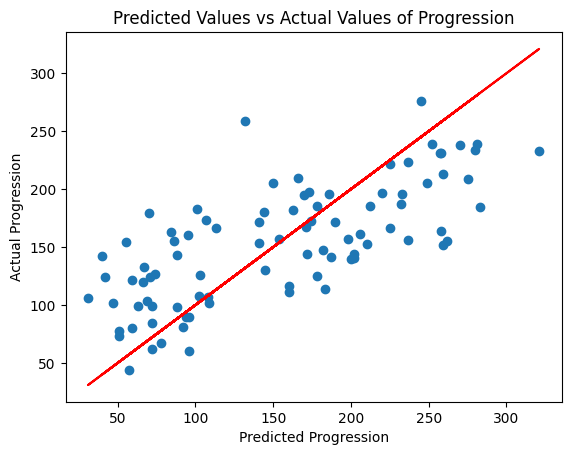

In [63]:
plot_regression_scatter(y_testing,y_predictions_1)

In [65]:
#plot_regression_scatter(y_testing,y_predictions_2)

What does this plot show us? Well for a start - our predictions don't look great. Only a few points lie on the red line (a perfect prediction).

Let us create another plot, this time called a Kernel Density Plot. This provides an estimate of the probability density function of the data. In simpler terms, it shows how likely different values are to occur within the dataset.

In [66]:
import seaborn as sns

def plot_kernel_density(actual,pred):
    """Creates Kernel Density Estimation plot

    Args:
        actual: the actual regression values
        pred: the predicted regression values

    Returns:
        None
    """
    
    plt.figure(figsize=(10, 7))
    # Kernel Density Estimation plot
    ax = sns.kdeplot(actual, color="r", label="Actual Value") #actual values
    sns.kdeplot(pred, color="b", label="Predicted Values", ax=ax) #predicted values

    plt.title('Actual vs Precited values')
    plt.legend()
    plt.show()

    return None

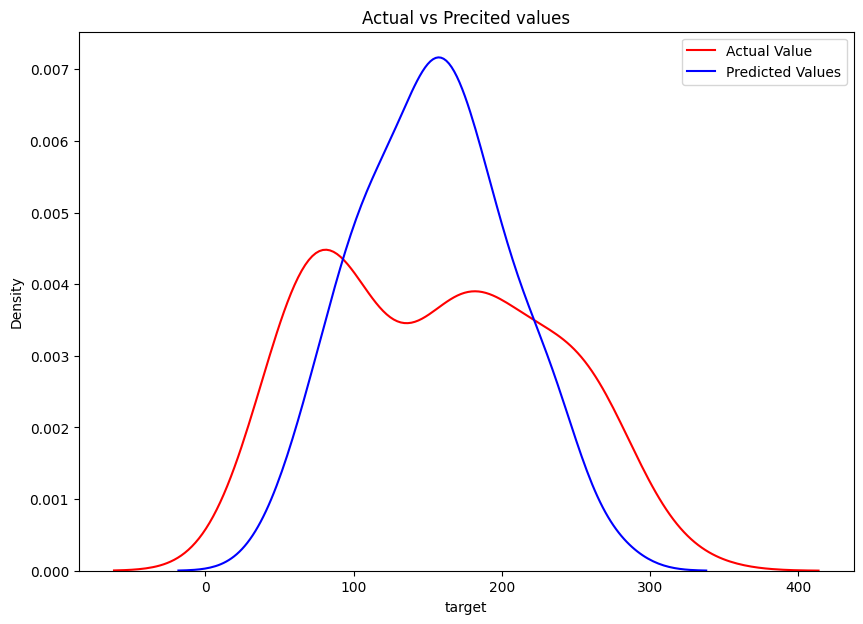

In [67]:
plot_kernel_density(y_testing,y_predictions_1)

In [68]:
#plot_kernel_density(y_testing,y_predictions_2)

### Good job getting this far!

![image](.//task.png)

You're clearly becoming a bit of an expert now. What other metrics are there to compare each model? 

Hint - here is a good website https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/

Find **atleast** 1 other metric and implement it into this notebook to further compare your models. 

In [ ]:
# Your code here

### Unsupervised vs Supervised Learning

**Supervised learning** is a machine learning approach where the algorithm learns from labeled training data. The training data consists of input features (also called independent variables) and their corresponding known output labels (also called dependent variables or target variables). The goal of supervised learning is to learn a mapping function that can predict the correct output label for new, unseen input data. In other words, the algorithm learns from examples where the desired outcome is already known.

**Unsupervised Learning**
Unsupervised learning, on the other hand, is a machine learning approach where the algorithm learns from unlabeled data. Unlike supervised learning, there are no predefined output labels or target variables in unsupervised learning. The algorithm's objective is to find patterns, structures, or relationships within the data without any prior knowledge of the outcomes. Unsupervised learning algorithms attempt to uncover hidden patterns, group similar data points together, or reduce the dimensionality of the data without being guided by explicit labels.

In summary, supervised learning uses labeled data to learn the relationship between input features and output labels, whereas unsupervised learning works with unlabeled data to discover patterns or structures in the data without any predefined target variables.

![image](.//task.png)

So far we have only used one type of supervised/unsupervised learning - can you tell which one we used?

Our next task will use a clustering algorithm. This is a type of... ah I almost gave the answer to the above question!

In the below code, some data has been generated using the `make_blobs` function. 

This has created some data in 'clusters'. The task - can you use a clustering algorithm to group this data?

This may help - https://scikit-learn.org/stable/modules/clustering

Now, you may be thinking that this looks like a classification problem, and you would be correct, you could solve this using a classification model. However, as we are investigating unsupervised learning, we want to complete this task without using the output values / y values! 

A graph has been created so that you can analyse the input data, but once you have had a look, try not to use the y values again! You may wish to steal some code from the below plot to analyse your results later though!

In [192]:
from sklearn.datasets import make_blobs

# Use the make_blobs function to generate inputs and outputs
X, y = make_blobs(n_samples=2000, centers=5, n_features=3, random_state=1, cluster_std = 1)

In [193]:
# The following code helps visualise the initial data. 

# Turn X into a dataframe 
X = pd.DataFrame(X).astype(float)

# Create a dictionary to add colours to the plot
colours_dict = {
    0:"red",
    1:"blue",
    2:"green",
    3:"orange",
    4:"purple",
    5:"black"
}
# Iterate through the outputs to create an array of colours
colour_map = [colours_dict[int(num)] for num in y]


# Create a scatter plot
fig = px.scatter_3d(X,x=0,y=1,z=2,color=colour_map)

# Update the graphics
fig.update_traces(marker=dict(size = 4,
                              line=dict(width=2,color='DarkSlateGrey')),
                              selector=dict(mode='markers'))

In [ ]:
# Your code here - good luck!